In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import missingno as msno # visualisation of missing values in the form of visual matrix
%matplotlib inline 
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('bestsellers with categories.csv')
# To display the top 5 rows
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
# checking the datatypes
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [4]:
print('-----------------------------------------------------------------------------------------------------------')
print(f'This dataset contains Bestselling Books from {df.Year.min()} to {df.Year.max()}.')
print('-----------------------------------------------------------------------------------------------------------\n')
df.info()

-----------------------------------------------------------------------------------------------------------
This dataset contains Bestselling Books from 2009 to 2019.
-----------------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

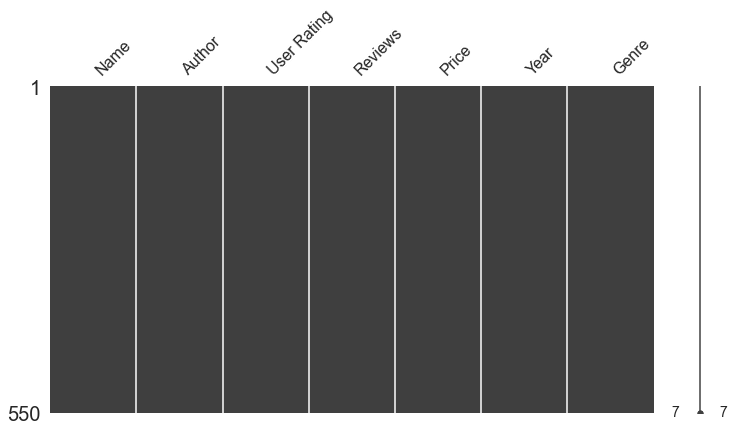

In [5]:
print(df.isnull().sum()) #summing up all the rows having missing values corresponding to their columns
msno.matrix(df, figsize=(12,6))
plt.show

### Checking for Duplicate Data

In [6]:
# Total number of rows and columns
df.shape

(550, 7)

In [7]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [8]:
#So no duplicate data to deal with
df.describe(include='O')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [9]:
# But a same book could be sold at a different price in the coming years. So we must keep the final values.
print(f'Before: {df.shape}')
df=df.drop_duplicates(subset='Name',keep='last')
print(f'After: {df.shape}')

Before: (550, 7)
After: (351, 7)


# Exploratory Data Analytics

### Checking the distribution of various parameters

<AxesSubplot:xlabel='User Rating'>

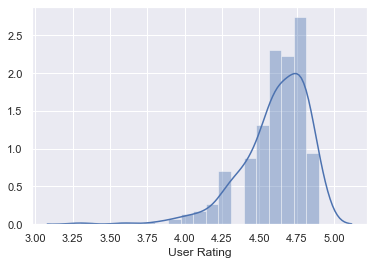

In [10]:
sns.distplot(df['User Rating'])

<AxesSubplot:xlabel='Reviews'>

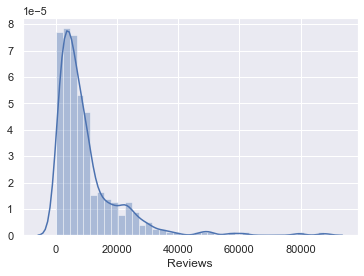

In [11]:
sns.distplot(df['Reviews'])

<AxesSubplot:xlabel='Price'>

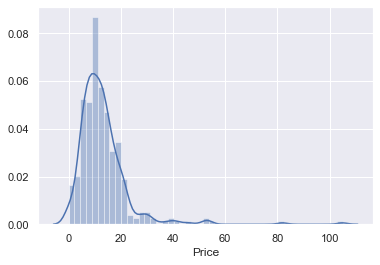

In [12]:
sns.distplot(df['Price'])

In [13]:
#Questions
#1.) Top 20 Bestselling Authors having highest bestselling books (genre wise)
#2.) Which book has the most reviews (top 10 books genre wise)
#3.) Which book has the most reviews (overall)
#4.) Which Genre sold the most between 2009-2019?
#5.) Which Year saw the most reviews?
#5.) Are user rating and reviews related?
#6.) Are user rating and price related?


In [14]:
# Splitting the data into Fiction and Non-Fiction
Fiction = df[df['Genre'] == 'Fiction']
Non_Fiction = df[df['Genre'] == 'Non Fiction']

In [15]:
Top_Fiction = Fiction.groupby('Author')[['Name']].count().sort_values(by='Name', ascending=False).reset_index()
Top_10_Fiction_Auth = Top_Fiction.head(10)
Top_10_Fiction_Auth

,Author,Name
0,Jeff Kinney,12
1,Rick Riordan,10
2,Stephenie Meyer,7
3,Dav Pilkey,6
4,J.K. Rowling,6
5,Suzanne Collins,5
6,John Grisham,5
7,E L James,5
8,Charlaine Harris,4
9,Stephen King,4


In [16]:
Top_Non_Fiction = Non_Fiction.groupby('Author')[['Name']].count().sort_values(by='Name', ascending=False).reset_index()
Top_10_Non_Fiction_Auth = Top_Non_Fiction.head(10)
Top_10_Non_Fiction_Auth

,Author,Name
0,Bill O'Reilly,6
1,Glenn Beck,3
2,Gary Chapman,3
3,Malcolm Gladwell,3
4,Ina Garten,3
5,Ree Drummond,3
6,Blue Star Coloring,2
7,Rupi Kaur,2
8,Sheryl Sandberg,2
9,Rob Elliott,2


<function matplotlib.pyplot.show(close=None, block=None)>

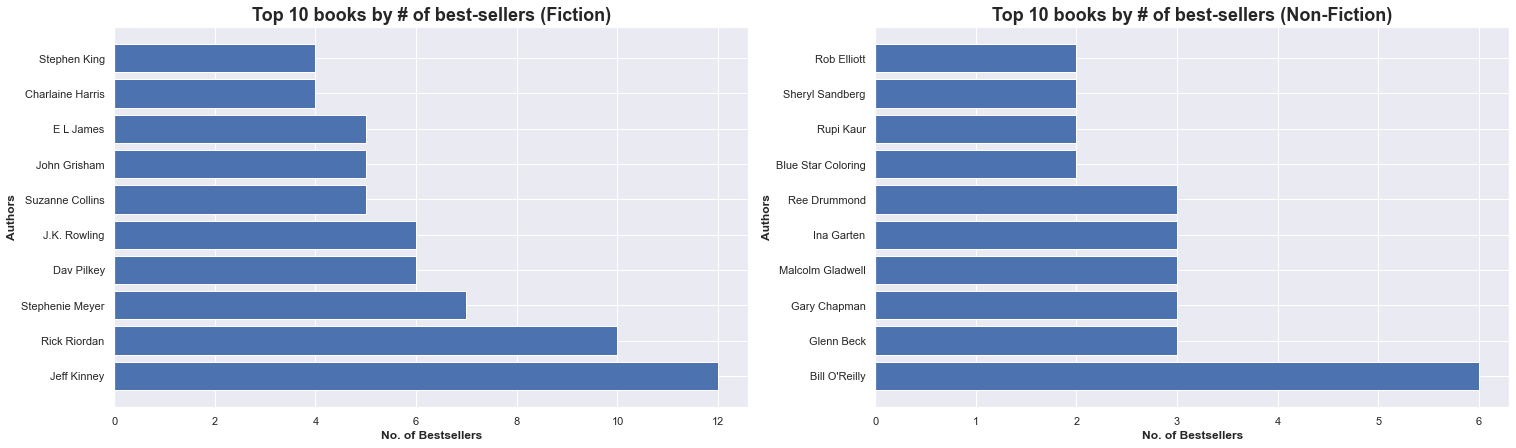

In [17]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
plt.barh(Top_10_Fiction_Auth['Author'], Top_10_Fiction_Auth['Name'])
plt.title('Top 10 books by # of best-sellers (Fiction)',fontweight='bold',fontsize=18)
plt.xlabel('No. of Bestsellers',fontweight='bold')
plt.ylabel('Authors',fontweight='bold')
plt.subplot(1,2,2)
plt.barh(Top_10_Non_Fiction_Auth['Author'], Top_10_Non_Fiction_Auth['Name'])
plt.ylabel('Authors',fontweight='bold')
plt.xlabel('No. of Bestsellers',fontweight='bold')
plt.title('Top 10 books by # of best-sellers (Non-Fiction)',fontweight='bold',fontsize=18)
plt.show

In [18]:
Top_Review_Book_Fiction = Fiction.groupby('Name')[['Reviews']].agg(np.mean).sort_values(by='Reviews',ascending=False).reset_index()
Top_10_Review_Book_Fiction = Top_Review_Book_Fiction.head(10)
Top_10_Review_Book_Fiction

,Name,Reviews
0,Where the Crawdads Sing,87841
1,The Girl on the Train,79446
2,Gone Girl,57271
3,The Fault in Our Stars,50482
4,The Nightingale: A Novel,49288
5,Fifty Shades of Grey: Book One of the Fifty Sh...,47265
6,The Martian,39459
7,All the Light We Cannot See,36348
8,The Alchemist,35799
9,The Goldfinch: A Novel (Pulitzer Prize for Fic...,33844


In [19]:
Top_Review_Book_Non_Fiction = Non_Fiction.groupby('Name')[['Reviews']].agg(np.mean).sort_values(by='Reviews',ascending=False).reset_index()
Top_10_Review_Book_Non_Fiction = Top_Review_Book_Non_Fiction.head(10)
Top_10_Review_Book_Non_Fiction

,Name,Reviews
0,Becoming,61133
1,"Unbroken: A World War II Story of Survival, Re...",29673
2,Educated: A Memoir,28729
3,The Subtle Art of Not Giving a F*ck: A Counter...,26490
4,The 5 Love Languages: The Secret to Love that ...,25554
5,How to Win Friends & Influence People,25001
6,The Boys in the Boat: Nine Americans and Their...,23358
7,The Four Agreements: A Practical Guide to Pers...,23308
8,School Zone - Big Preschool Workbook - Ages 4 ...,23047
9,The Life-Changing Magic of Tidying Up: The Jap...,22641


<function matplotlib.pyplot.show(close=None, block=None)>

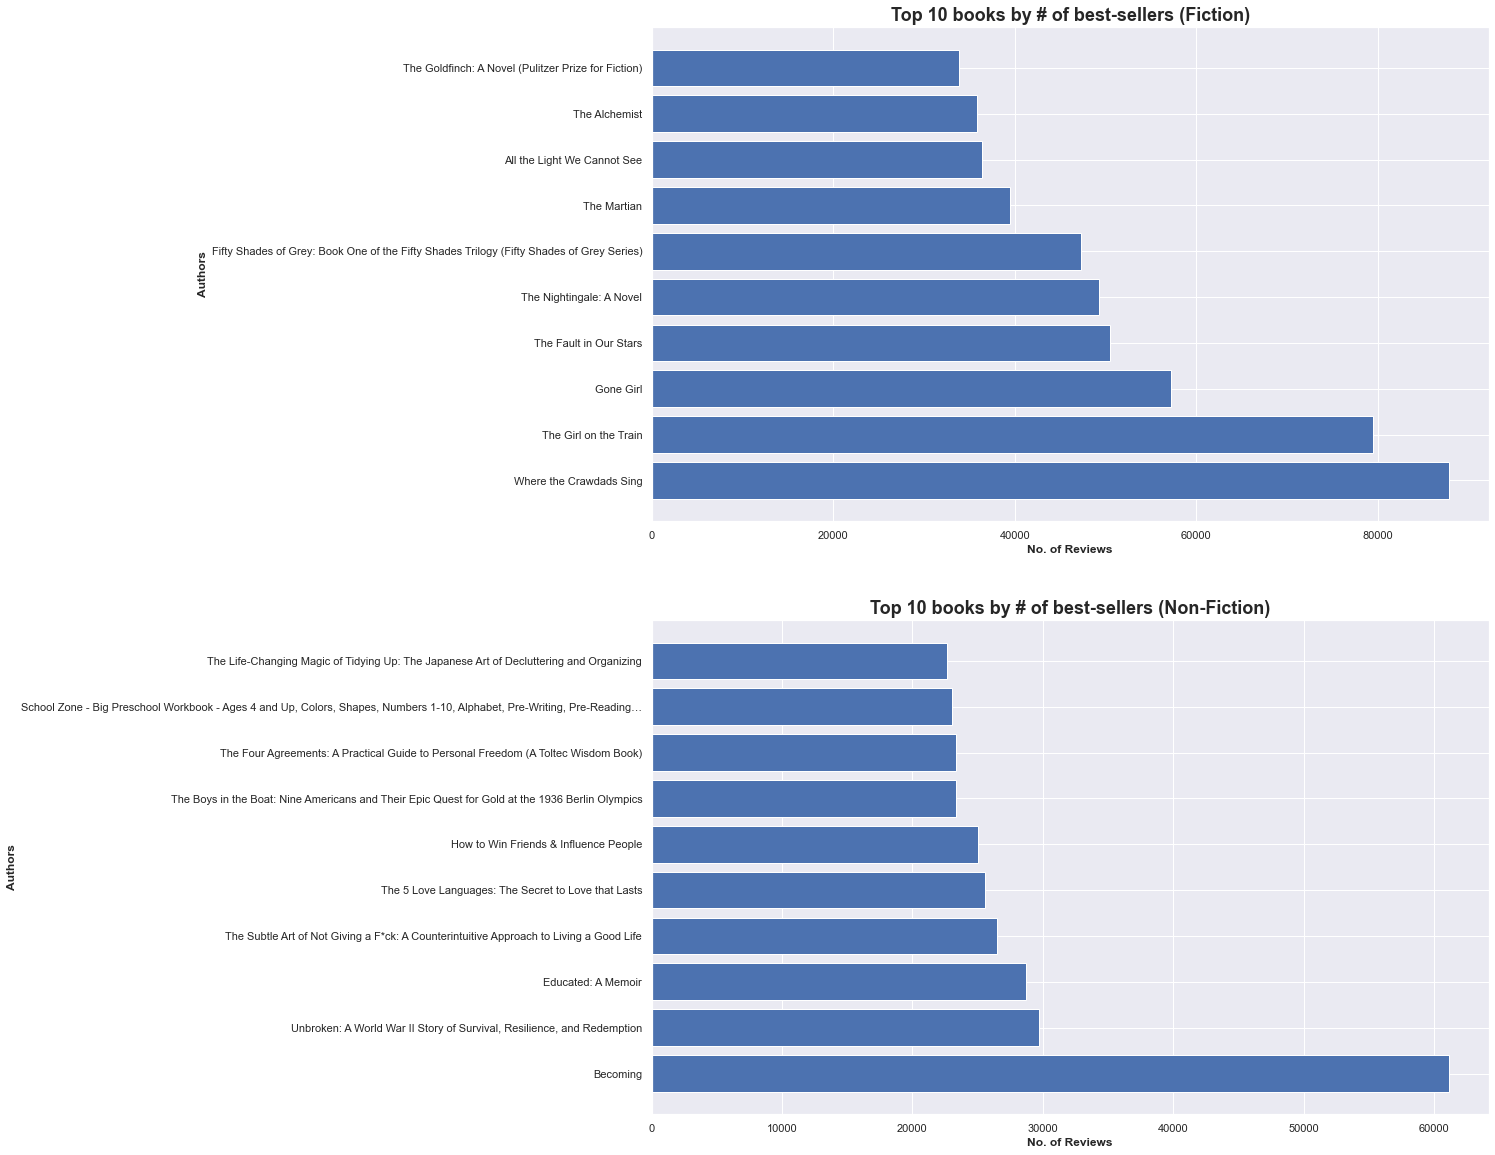

In [20]:
plt.figure(figsize=(15,20))
plt.subplot(2,1,1)
plt.barh(Top_10_Review_Book_Fiction['Name'], Top_10_Review_Book_Fiction['Reviews'])
plt.title('Top 10 books by # of best-sellers (Fiction)',fontweight='bold',fontsize=18)
plt.xlabel('No. of Reviews',fontweight='bold')
plt.ylabel('Authors',fontweight='bold')
plt.subplot(2,1,2)
plt.barh(Top_10_Review_Book_Non_Fiction['Name'], Top_10_Review_Book_Non_Fiction['Reviews'])
plt.ylabel('Authors',fontweight='bold')
plt.xlabel('No. of Reviews',fontweight='bold')
plt.title('Top 10 books by # of best-sellers (Non-Fiction)',fontweight='bold',fontsize=18)
plt.show

In [21]:
Top_Review_Book = df.groupby('Name')[['Reviews']].agg(np.mean).sort_values(by='Reviews',ascending=False).reset_index()
Top_10_Review_Book = Top_Review_Book.head(10)
Top_10_Review_Book

,Name,Reviews
0,Where the Crawdads Sing,87841
1,The Girl on the Train,79446
2,Becoming,61133
3,Gone Girl,57271
4,The Fault in Our Stars,50482
5,The Nightingale: A Novel,49288
6,Fifty Shades of Grey: Book One of the Fifty Sh...,47265
7,The Martian,39459
8,All the Light We Cannot See,36348
9,The Alchemist,35799


Text(0, 0.5, 'Authors')

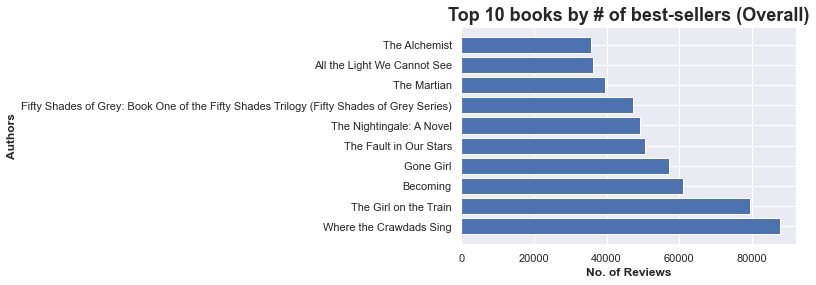

In [22]:
plt.barh(Top_10_Review_Book['Name'], Top_10_Review_Book['Reviews'])
plt.title('Top 10 books by # of best-sellers (Overall)',fontweight='bold',fontsize=18)
plt.xlabel('No. of Reviews',fontweight='bold')
plt.ylabel('Authors',fontweight='bold')

([<matplotlib.patches.Wedge at 0x2588ac8fd00>,
 [Text(-0.15211534367268678, 1.08943146742663, 'Non Fiction'),
  Text(0.15211534367268642, -1.08943146742663, 'Fiction')],
 [Text(-0.08297200563964734, 0.5942353458690709, '54.4%'),
  Text(0.08297200563964713, -0.5942353458690709, '45.6%')])

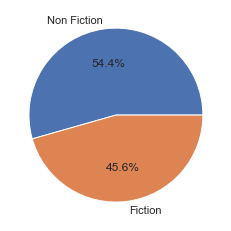

In [23]:
plt.pie(df['Genre'].value_counts(),labels=['Non Fiction','Fiction'],autopct='%.1f%%')

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

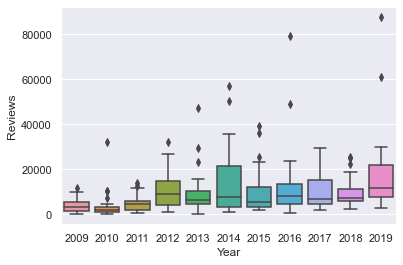

In [24]:
sns.boxplot(df['Year'],df['Reviews'])

In [25]:
# 2014 saw the highest number of Reviews

In [26]:
# Kendall's Rank Correlation for User Rating and Reviews
from scipy.stats import kendalltau
stat, p = kendalltau(df['User Rating'],df['Reviews'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably User Rating and Reviews independent')
else:
    print('Probably User Rating and Reviews dependent')

stat=0.075, p=0.049
Probably User Rating and Reviews dependent


In [27]:
# Kendall's Rank Correlation for User Rating and Price
from scipy.stats import kendalltau
stat, p = kendalltau(df['User Rating'],df['Price'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably User Rating and Price independent')
else:
    print('Probably User Rating and Price dependent')

stat=-0.063, p=0.105
Probably User Rating and Price independent
